In [10]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [23]:
from pathlib import Path

from cycler import cycler

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

from matplotlib import rcParams

import numpy as np
import pandas as pd
import cmocean
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import geopandas as gpd
import themepy

import intro_plots as ip
paper_path = Path('../../paper/figures/')

slide_path = Path('../../slides/figures/intro/')
proposal_path = Path('../../draft/figures/intro/')

proposal_path = Path('../draft/figures/math/')

theme = themepy.Theme('paper')
rcParams['font.family'] = 'dejavu sans'
rcParams['figure.dpi'] = 200

In [24]:
ny_all = pd.read_csv("nydata")

ny = ny_all[ny_all['NAME'].isin(ip.cdict.keys())].copy().fillna(0)

ny['DATES'] = pd.to_datetime(ny['DATE'])

ny['TEMP (°F)'] = ny['TAVG'].apply(lambda x: f"{x:2.2f}")
ny['PRCP (in.)'] = ny['PRCPI'].apply(lambda x: f"{x:1.4f}")    

In [25]:
sample = ny[['NAME', 'TEMP (°F)','PRCP (in.)']][ny['PRCPI']>0].sample(frac=1, random_state=12892).head(5)
sample

,NAME,TEMP (°F),PRCP (in.)
28243,NEW YORK LAGUARDIA AP,61.00,0.4685
3989,BINGHAMTON,-12.00,0.0315
28121,NEW YORK JFK INTL AP,49.00,0.7402
19907,ISLIP LI MACARTHUR AP,11.00,0.0709
41646,SYRACUSE HANCOCK INTL AP,13.00,0.0118


C:\Users\story\Anaconda3\envs\mplrelease\lib\site-packages\cartopy\mpl\geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


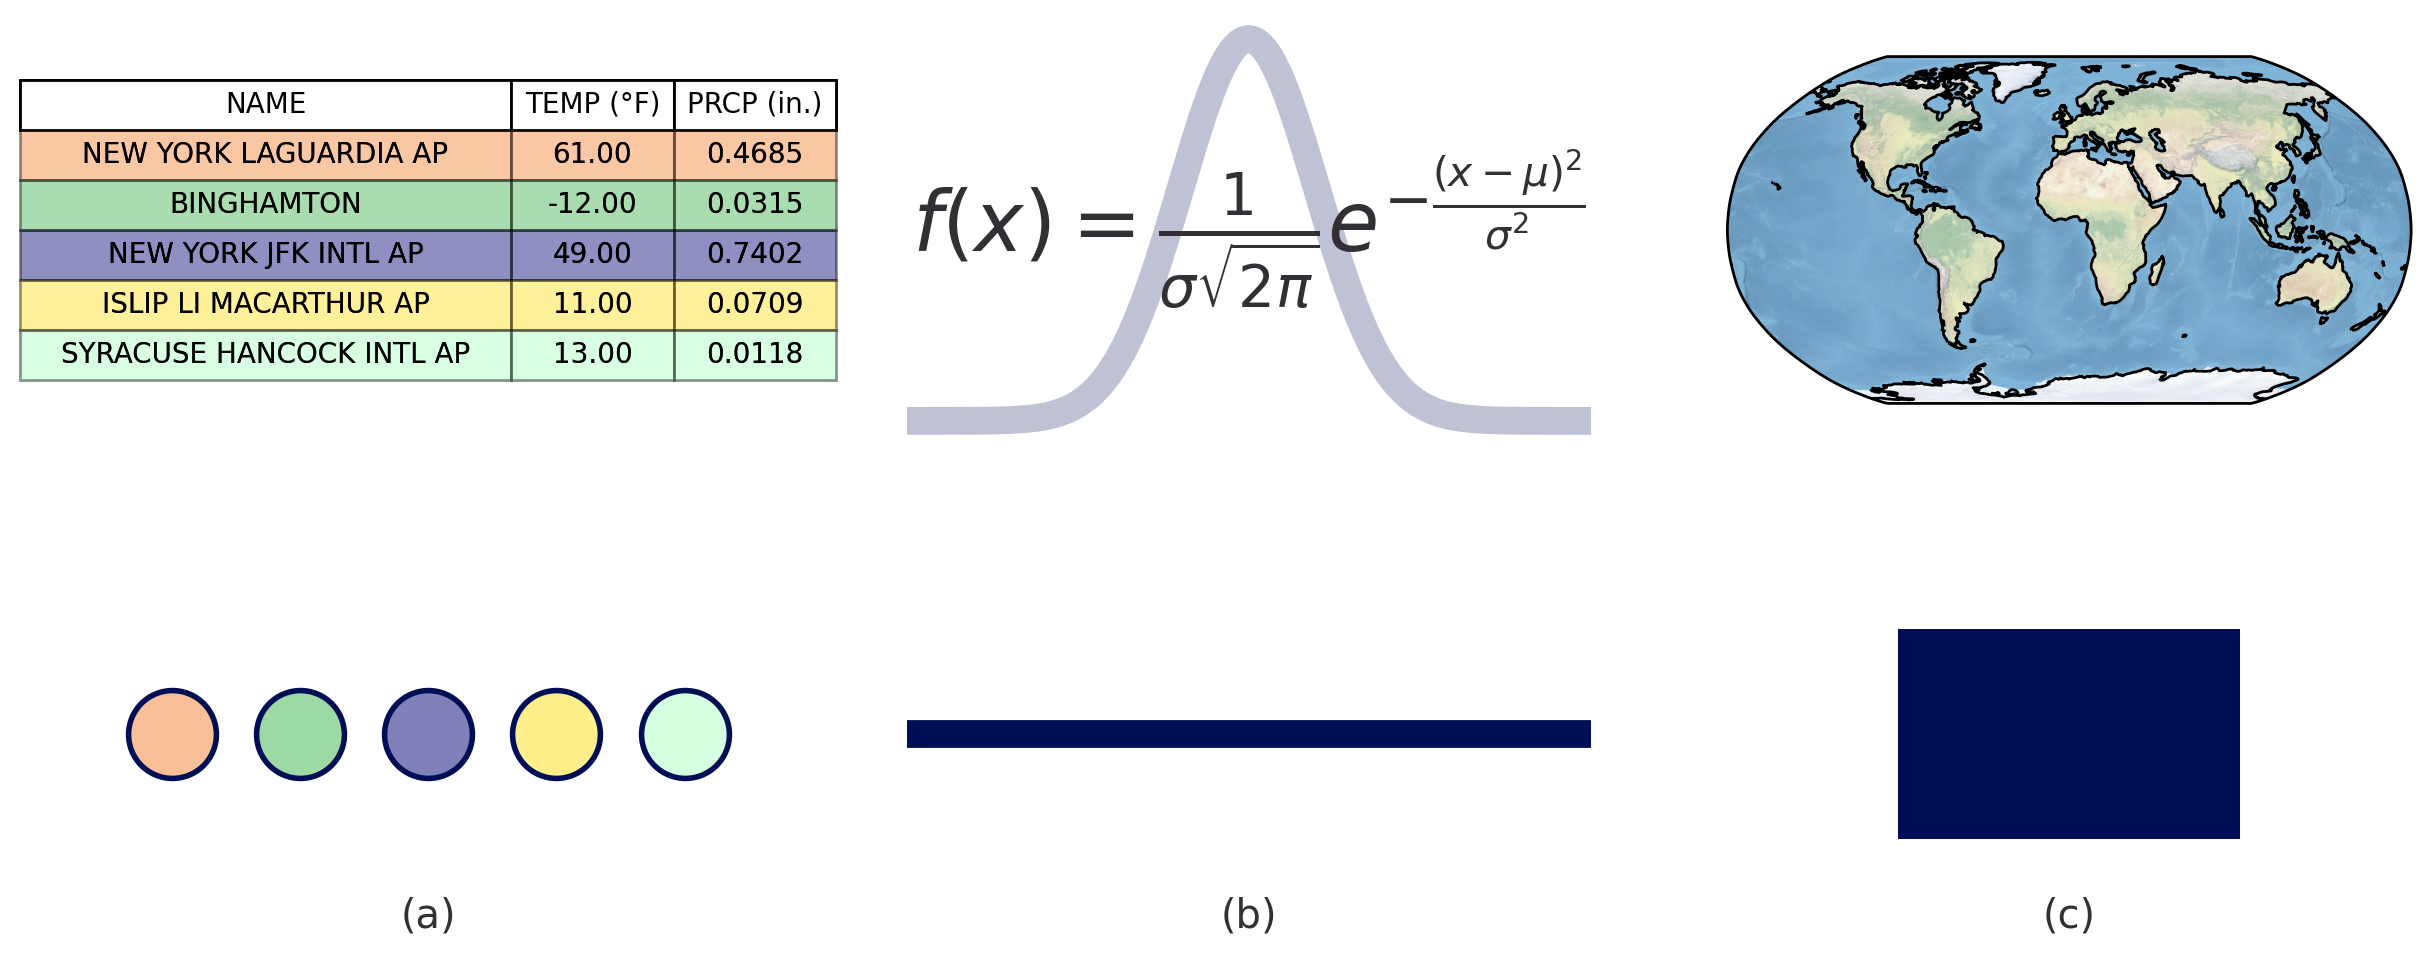

In [26]:
fig, axd = plt.subplot_mosaic([['table', 'function', 'image'], ['0D', '1D', '2D']], figsize=(15,6), facecolor='white')
tab = ip.plot_table(axd['table'], sample, ccolors=['k']*3)
fig.canvas.draw()
x = np.linspace(-0.25, 1.25, 5)
y=[.5]*5
axd['0D'].set(xlim=(-0.5, 1.5), ylim=(.25, .75))

oc = 'C4'

for i, (sn, xi, yi) in enumerate(zip(sample['NAME'], x,y)):
    xt, yt = ip.source_cell(tab[i+1,0],'k', xr=(i/10)+.5)
    station = tab[(i+1,0)].get_text().get_text()
    for c in range(3):
        tab[(i+1,c)].set_facecolor(ip.cdict[station])
        tab[(i+1,c)].set_alpha(.25)
        tab[(i+1,c)].get_text().set_color("black")
    ar = mpatches.ConnectionPatch(xyA=(xt,yt), coordsA=axd['table'].transData,
                      xyB=(xi,yi), coordsB=axd['0D'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0",
                                 linestyle=':', color=ip.cdict[station], lw=3)
    #fig.add_artist(ar)
    axd['0D'].scatter(xi,yi, s=1000, color=mcolors.to_rgba(ip.cdict[station], alpha=.5), edgecolor='C0', lw=2)
    

axd['function'].text(0.5, 0.5, r'$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{\sigma^2}}$', transform=axd['function'].transAxes, fontsize=30, ha='center', va='center')
x = np.linspace(-5,5,10000)
y = lambda x: (1/np.sqrt(2*np.pi))*np.e**(-x**2/2)
axd['function'].plot(x, y(x), alpha=.25, lw=10, color='C0')
axd['1D'].plot([-5,5], [.5, .5], color='C0', lw=10)
axd['1D'].set(xlim=(-5, 5), ylim=(.25, .75))
axd['function'].set(xlim=(-5,5))

af = mpatches.ConnectionPatch(xyA=(0,0), coordsA=axd['function'].transData, xyB=(0, .5), coordsB=axd['1D'].transData,
                              arrowstyle='simple', mutation_scale=150, mutation_aspect=.9, facecolor=mcolors.to_rgba('C0', .25), edgecolor='C0', lw=4)
#fig.add_artist(af)


axd['image'] =  plt.subplot(2,3,3, projection=ccrs.Robinson())
axd['image'].stock_img()
axd['image'].coastlines()

r = mpatches.Rectangle((.25,.25), .5, .5)
axd['2D'].add_artist(r)

x0, x1, _, _ = axd['image'].get_extent()

al = mpatches.ConnectionPatch(xyA=(x0, 0), coordsA=axd['image'].transData, xyB=(.25, .5), coordsB=axd['2D'].transData,
                              arrowstyle='-',linestyle=':', edgecolor='C0', lw=3, zorder=-1)
#fig.add_artist(al)
ar = mpatches.ConnectionPatch(xyA=(x1, 0), coordsA=axd['image'].transData, xyB=(.75, .5), coordsB=axd['2D'].transData,
                              arrowstyle='-', linestyle=':', edgecolor='C0', lw=3, zorder=-1)
#fig.add_artist(ar)
#axd['2D'].set_aspect('equal')
for ax in axd.values():
    ax.axis('off')
    ax.set_facecolor('white')


for (n, l) in [('0D', 'a'), ('1D', 'b'), ('2D', 'c')]:
    axd[n].set_title(f"({l})", fontsize='x-large', y=0)
    
fig.savefig(proposal_path/'k_different_types', bbox_inches='tight', facecolor='white', dpi=200)

In [235]:
axd['image'].get_extent()

(-17005833.33052523, 17005833.33052523, -8625154.6651, 8625154.6651)